In [1]:
import numpy as np
import scipy as sp
import sympy as sm
import pandas as pd
import timeit
import matplotlib.pyplot as plt

In [2]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
c

A_c_F/(1 + exp(-r*(F - F_p))) + I0

In [3]:
c1 = c.subs({I0 : 0.3, Ac_F: 0.5, r : 1.95, F_p : 4.5})
c2 = sm.lambdify(F, c1, "numpy" )

In [4]:
t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.2*f0
F

f_0*sin(t) + 1.2*f_0

In [5]:
F1 = sm.lambdify([f0, t], F, "numpy")

Text(0, 0.5, 'magnitude of force')

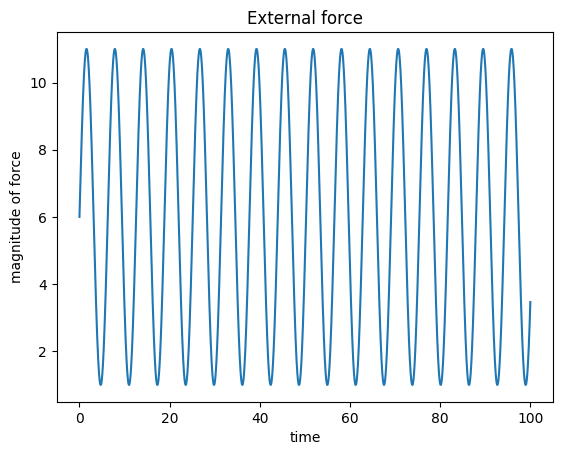

In [6]:
tm = np.linspace(0, 100, 10001)
F2=F1(5,tm)

%matplotlib inline
plt.plot(tm, F2)
plt.title("External force")
plt.xlabel("time"); plt.ylabel("magnitude of force")

Text(0.5, 1.0, 'Profile of damping value \n as a function of force')

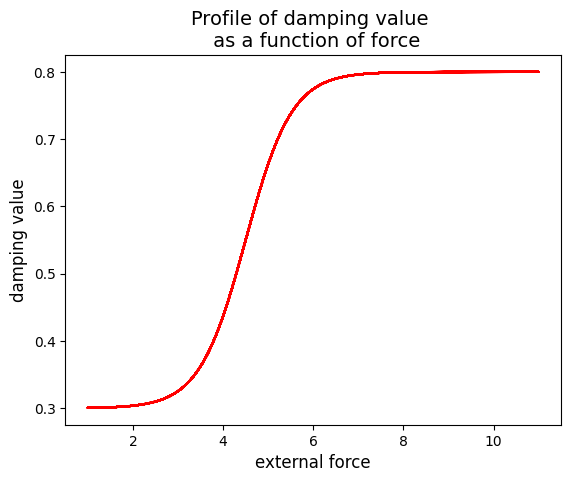

In [7]:
plt.plot(F2, c2(F2), c = 'red')
plt.xlabel("external force",fontsize =12); plt.ylabel("damping value", fontsize =12)
plt.title("Profile of damping value \n as a function of force", fontsize =14)

Text(0.5, 1.0, 'Profile of spring value \n as a function of force')

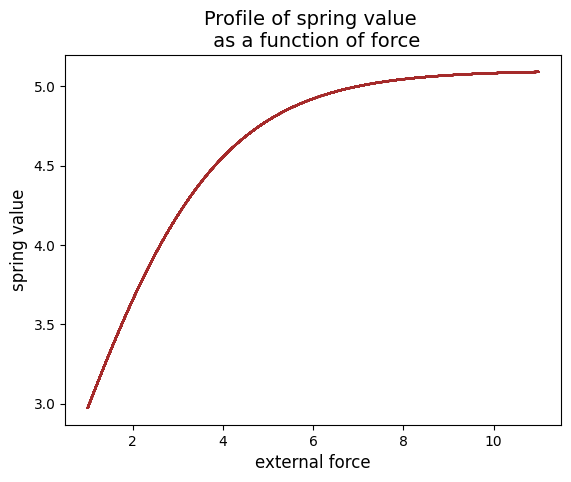

In [8]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
k1 = c.subs({I0 : 0.1, Ac_F: 5, r : 0.6, F_p : 0.5})
k2 = sm.lambdify(F, k1, "numpy" )

t = np.linspace(0, 10, 101)
F = 5*np.sin(t) + 5

plt.plot(F2, k2(F2), c = 'brown')
plt.xlabel("external force", fontsize =12); plt.ylabel("spring value", fontsize =12)
plt.title("Profile of spring value \n as a function of force", fontsize =14)

In [9]:
##Simulation of SDMS
Ts = 10/1000
N = np.shape(F2)[0]

x1 = np.zeros(N+1);
x2 = np.zeros(N+1);
x1[0] = 0.3; ##Initial position
x2[0] = 0  ##Initial velocity

M = 2

for i in np.arange(N):
    #print(i)
    Ki = k2(F2[i]); Ci = c2(F2[i])
    
    a11 = 1; a12 = Ts; 
    a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)
    
    b11 = 0; b21 = Ts/M
    x1[i+1] = a11*x1[i] + a12*x2[i] + b11*F2[i]
    x2[i+1] = a21*x1[i] + a22*x2[i] + b21*F2[i]

Text(0.5, 1.0, 'System dynamics')

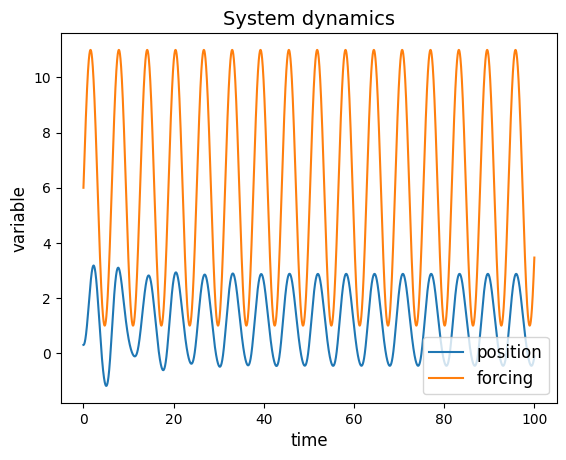

In [10]:
%matplotlib inline
pos = x1[:-1]
plt.plot(tm, pos, label = 'position')
plt.plot(tm, F2, label = 'forcing')
legend = plt.legend(loc=4, fontsize=12, fancybox=True)
plt.xlabel("time", fontsize=12); plt.ylabel("variable",fontsize=12)
legend.set_title("") 
plt.title("System dynamics", fontsize=14)

## Differential resilience experiencing similar external forcing ##

Text(0, 0.5, 'damping value')

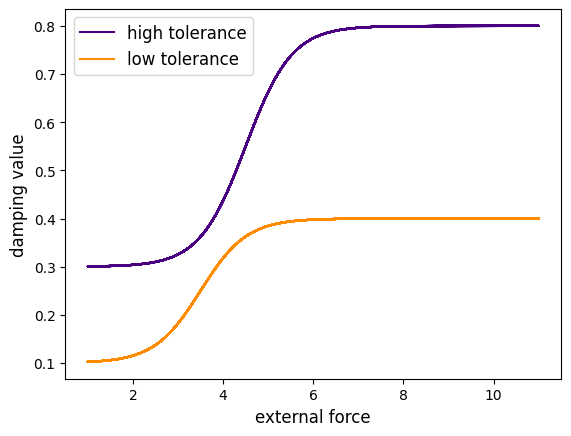

In [11]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))

cc1 = c.subs({I0 : 0.1, Ac_F: 0.3, r : 1.95, F_p : 3.5})
cc2 = sm.lambdify(F, cc1, "numpy" )
cc2

t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.2*f0
F1 = sm.lambdify([f0, t], F, "numpy")
F1

tm = np.linspace(0, 100, 10001)
F2=F1(5,tm)
F2

%matplotlib inline
plt.plot(F2, c2(F2), label = "high tolerance", c = 'indigo')
plt.plot(F2, cc2(F2), label = "low tolerance", c = 'darkorange')
legend = plt.legend(loc=0, fontsize=12, fancybox=True)
legend.set_title("") 
plt.xlabel("external force",fontsize=12); plt.ylabel("damping value", fontsize=12)



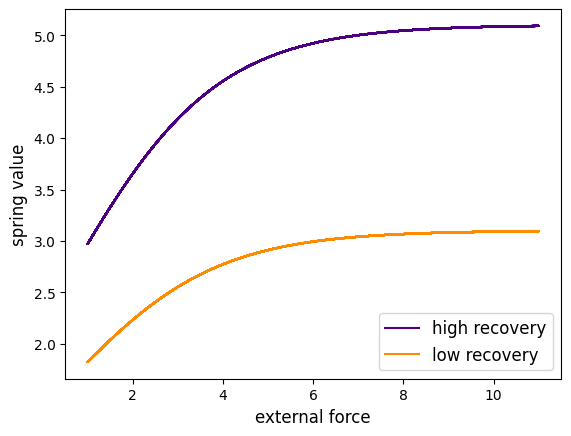

In [12]:

I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
kk1 = c.subs({I0 : 0.1, Ac_F: 3, r : 0.6, F_p : 0.5})
kk2 = sm.lambdify(F, kk1, "numpy" )

t = np.linspace(0, 10, 101)
F = 5*np.sin(t) + 5

%matplotlib inline
plt.plot(F2, k2(F2),  label = "high recovery", c = 'indigo')
plt.plot(F2, kk2(F2), label = "low recovery", c = 'darkorange')
legend = plt.legend(loc=0, fontsize=12, fancybox=True)
plt.xlabel("external force", fontsize=12); plt.ylabel("spring value",  fontsize=12)
legend.set_title("") 


Text(0.5, 0, 'time')

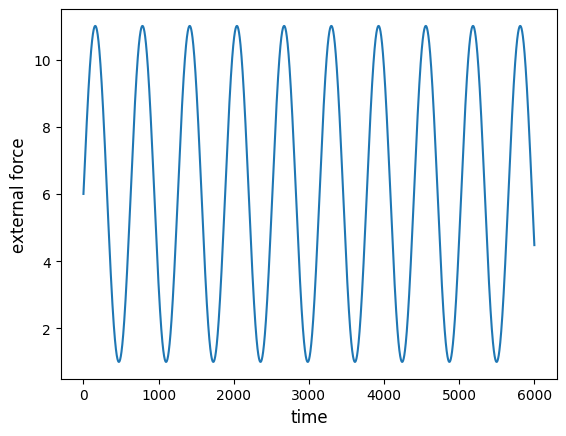

In [13]:
%matplotlib inline
tm = np.linspace(0, 60, 6001)
F2=F1(5,tm)
F2

%matplotlib inline
plt.plot(F2)
plt.ylabel("external force", fontsize=12); plt.xlabel("time",  fontsize=12)

In [14]:
def spring_damper_simu(Frc, pos, vel, mass, key):
    
    Ts = 10/1000
    N = np.shape(Frc)[0]

    x1 = np.zeros(N+1);
    x2 = np.zeros(N+1);
    x1[0] = pos; ##Initial position
    x2[0] = vel;  ##Initial velocity

    M = mass
    
    if (key ==1):

        for i in np.arange(N):
            Ki = k2(Frc[i]); Ci = c2(Frc[i])

            a11 = 1; a12 = Ts; 
            a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)

            b11 = 0; b21 = Ts/M
            x1[i+1] = a11*x1[i] + a12*x2[i] + b11*Frc[i]
            x2[i+1] = a21*x1[i] + a22*x2[i] + b21*Frc[i]

        return(x1)

    if (key == 2):
        
        for i in np.arange(N):
            Ki = kk2(Frc[i]); Ci = cc2(Frc[i])

            a11 = 1; a12 = Ts; 
            a21 = -(Ki*Ts)/M; a22 = 1 - ((Ts*Ci)/M)

            b11 = 0; b21 = Ts/M
            x1[i+1] = a11*x1[i] + a12*x2[i] + b11*Frc[i]
            x2[i+1] = a21*x1[i] + a22*x2[i] + b21*Frc[i]
        
        return(x1)

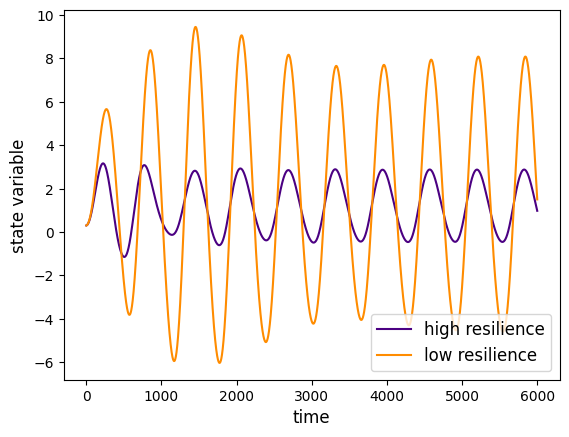

In [15]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# one = mpatches.Patch(facecolor='indigo', label='high resilience', linewidth = 0.5, edgecolor = 'black')
# two = mpatches.Patch(facecolor='darkorange', label = 'low resilience', linewidth = 0.5, edgecolor = 'black')


plt.plot(spring_damper_simu(F2, 0.3, 0.1, 2, 1), c= 'indigo', label='high resilience', )
plt.plot(spring_damper_simu(F2, 0.3, 0.1, 2, 2), c = 'darkorange', label='low resilience', )
plt.ylabel('state variable', fontsize=12); plt.xlabel("time", fontsize=12)
legend = plt.legend( loc=4, fontsize=12, fancybox=True)
legend.set_title("")  

In [17]:
import import_ipynb
%run /home/karthik/jupyter_dir/jupyter_env/IRI_calc.ipynb

In [18]:
spring_damper_simu(F2, 0.3, 0.1, 2, 1)

array([0.3       , 0.301     , 0.3022223 , ..., 1.00582862, 0.99099386,
       0.97619066])

In [19]:
spring_damper_simu(F2, 0.3, 0.1, 2, 2)

array([0.3       , 0.301     , 0.30225311, ..., 1.62201139, 1.56164874,
       1.50139072])

In [69]:
frc = np.random.normal(6, 2.5, 1000);

MRR_LR_df = np.reshape(np.zeros(8), [1,8])
MRR_HR_df = np.reshape(np.zeros(8), [1,8])

for i in np.arange(100):
    
    F2=F1(np.random.choice(frc),tm)
    HR = spring_damper_simu(F2, 0.3, 0.1, 2, 1)
    LR = spring_damper_simu(F2, 0.3, 0.1, 2, 2)
    
    MRR_HR = np.reshape(np.insert(resilience_calc_func(HR),0, i), [1,8])
    MRR_LR = np.reshape(np.insert(resilience_calc_func(LR),0, i), [1,8])
    
    MRR_LR_df = np.vstack([MRR_LR_df, MRR_LR])
    MRR_HR_df = np.vstack([MRR_HR_df, MRR_HR])
    
    print(i)

[127. 176. 151. 163. 158. 160. 159. 160. 159. 421. 521. 467. 490. 480.
 484. 482. 483. 483.]
[127. 151. 158. 159. 159. 160. 160. 163. 176. 421. 467. 480. 482. 483.
 483. 484. 490. 521.]
[139. 146. 151. 156. 159. 157. 156. 155. 156. 437. 458. 471. 483. 487.
 482. 479. 479. 481.]
[139. 146. 151. 155. 156. 156. 156. 157. 159. 437. 458. 471. 479. 479.
 481. 482. 483. 487.]
0
[126. 181. 152. 160. 158. 158. 159. 158. 158. 418. 519. 470. 484. 480.
 481. 481. 480. 481.]
[126. 152. 158. 158. 158. 158. 159. 160. 181. 418. 470. 480. 480. 481.
 481. 481. 484. 519.]
[135. 146. 152. 160. 159. 155. 155. 156. 156. 432. 456. 471. 488. 485.
 477. 476. 478. 479.]
[135. 146. 152. 155. 155. 156. 156. 159. 160. 432. 456. 471. 476. 477.
 478. 479. 485. 488.]
1
[127. 171. 152. 163. 160. 161. 161. 160. 160. 423. 521. 467. 493. 482.
 487. 485. 485. 485.]
[127. 152. 160. 160. 160. 161. 161. 163. 171. 423. 467. 482. 485. 485.
 485. 487. 493. 521.]
[143. 148. 150. 154. 158. 158. 157. 156. 155. 441. 461. 472. 480. 

[129. 164. 155. 161. 161. 161. 162. 161. 161. 427. 516. 473. 493. 487.
 489. 489. 488. 488.]
[129. 155. 161. 161. 161. 161. 161. 162. 164. 427. 473. 487. 488. 488.
 489. 489. 493. 516.]
[149. 149. 150. 152. 155. 158. 158. 158. 157. 444. 461. 471. 478. 484.
 487. 486. 484. 483.]
[149. 149. 150. 152. 155. 157. 158. 158. 158. 444. 461. 471. 478. 483.
 484. 484. 486. 487.]
22
[125. 182. 152. 159. 157. 158. 158. 157. 158. 417. 516. 471. 481. 479.
 480. 480. 479. 480.]
[125. 152. 157. 157. 158. 158. 158. 159. 182. 417. 471. 479. 479. 480.
 480. 480. 481. 516.]
[134. 146. 154. 160. 158. 154. 155. 156. 156. 430. 454. 474. 489. 481.
 474. 475. 478. 478.]
[134. 146. 154. 154. 155. 156. 156. 158. 160. 430. 454. 474. 474. 475.
 478. 478. 481. 489.]
23
[127. 173. 151. 163. 159. 161. 160. 160. 160. 422. 522. 467. 492. 481.
 486. 484. 484. 484.]
[127. 151. 159. 160. 160. 160. 161. 163. 173. 422. 467. 481. 484. 484.
 484. 486. 492. 522.]
[141. 146. 150. 155. 159. 158. 156. 155. 155. 439. 459. 471. 481

[148. 142. 146. 157. 154. 150. 150. 153. 152. 452. 459. 478. 501. 486.
 479. 484. 488. 486.]
[142. 146. 148. 150. 150. 152. 153. 154. 157. 452. 459. 478. 479. 484.
 486. 486. 488. 501.]
[145. 156. 161. 163. 165. 167. 167. 168. 168. 486. 481. 481. 480. 480.
 480. 479. 479. 478.]
[145. 156. 161. 163. 165. 167. 167. 168. 168. 478. 479. 479. 480. 480.
 480. 481. 481. 486.]
44
[127. 176. 151. 163. 158. 160. 159. 160. 159. 421. 521. 467. 490. 480.
 484. 482. 483. 483.]
[127. 151. 158. 159. 159. 160. 160. 163. 176. 421. 467. 480. 482. 483.
 483. 484. 490. 521.]
[139. 147. 150. 156. 159. 157. 156. 155. 156. 436. 459. 471. 483. 487.
 482. 479. 479. 480.]
[139. 147. 150. 155. 156. 156. 156. 157. 159. 436. 459. 471. 479. 479.
 480. 482. 483. 487.]
45
[126. 180. 151. 162. 158. 159. 158. 159. 159. 419. 520. 469. 486. 480.
 482. 481. 481. 482.]
[126. 151. 158. 158. 159. 159. 159. 162. 180. 419. 469. 480. 481. 481.
 482. 482. 486. 520.]
[136. 145. 151. 158. 159. 156. 154. 156. 156. 433. 456. 471. 486

[126. 181. 151. 162. 158. 159. 158. 159. 159. 419. 520. 469. 486. 480.
 482. 481. 481. 482.]
[126. 151. 158. 158. 159. 159. 159. 162. 181. 419. 469. 480. 481. 481.
 482. 482. 486. 520.]
[136. 146. 152. 158. 160. 155. 155. 156. 156. 433. 457. 472. 486. 486.
 477. 477. 479. 479.]
[136. 146. 152. 155. 155. 156. 156. 158. 160. 433. 457. 472. 477. 477.
 479. 479. 486. 486.]
66
[126. 180. 151. 161. 158. 159. 158. 159. 158. 419. 519. 469. 485. 480.
 482. 481. 481. 481.]
[126. 151. 158. 158. 158. 159. 159. 161. 180. 419. 469. 480. 481. 481.
 481. 482. 485. 519.]
[136. 146. 152. 158. 160. 155. 155. 156. 156. 433. 456. 472. 486. 486.
 477. 477. 479. 479.]
[136. 146. 152. 155. 155. 156. 156. 158. 160. 433. 456. 472. 477. 477.
 479. 479. 486. 486.]
67
[126. 178. 151. 162. 158. 159. 159. 159. 159. 420. 520. 468. 487. 480.
 483. 482. 482. 482.]
[126. 151. 158. 159. 159. 159. 159. 162. 178. 420. 468. 480. 482. 482.
 482. 483. 487. 520.]
[137. 146. 152. 158. 160. 157. 155. 155. 156. 434. 457. 472. 485

[129. 161. 158. 159. 163. 160. 161. 160. 161. 429. 512. 477. 491. 490.
 489. 490. 489. 490.]
[129. 158. 159. 160. 160. 161. 161. 161. 163. 429. 477. 489. 489. 490.
 490. 490. 491. 512.]
[151. 151. 151. 152. 154. 157. 158. 158. 157. 445. 462. 472. 478. 482.
 486. 487. 485. 483.]
[151. 151. 151. 152. 154. 157. 157. 158. 158. 445. 462. 472. 478. 482.
 483. 485. 486. 487.]
88
[128. 167. 153. 163. 160. 161. 161. 161. 161. 425. 519. 469. 493. 484.
 488. 486. 487. 487.]
[128. 153. 160. 161. 161. 161. 161. 163. 167. 425. 469. 484. 486. 487.
 487. 488. 493. 519.]
[145. 149. 150. 153. 156. 158. 158. 156. 156. 442. 461. 472. 480. 485.
 487. 485. 482. 481.]
[145. 149. 150. 153. 156. 156. 156. 158. 158. 442. 461. 472. 480. 481.
 482. 485. 485. 487.]
89
[127. 177. 150. 163. 158. 160. 159. 159. 159. 421. 521. 467. 489. 480.
 484. 482. 482. 483.]
[127. 150. 158. 159. 159. 159. 160. 163. 177. 421. 467. 480. 482. 482.
 483. 484. 489. 521.]
[138. 146. 150. 156. 160. 157. 155. 155. 156. 436. 458. 471. 483

In [71]:
MRR_LR_df0 = np.delete(MRR_LR_df, 0, 0)


In [72]:
MRR_HR_df0 = np.delete(MRR_HR_df, 0, 0)

In [73]:
MRR_df0 = np.vstack([MRR_LR_df0, MRR_HR_df0])

In [76]:
MRR_df = pd.DataFrame(MRR_df0)

In [79]:
MRR_df.columns = ['id','uRg', 'uRr', 'uRt', 'Ri', 'vRg', 'vRr', 'vRt']

In [80]:
MRR_df.to_csv('MRR_single_equi.csv')

**Accounting for the external force in the state response**

In [84]:
posh1 = spring_damper_simu(F2, 0.3, 0.1, 2, 1); posh = posh1[1:]; rsh = posh/ F2

In [85]:
posl1 = spring_damper_simu(F2, 0.3, 0.1, 2, 2); posl = posl1[1:]; rsl = posl/ F2

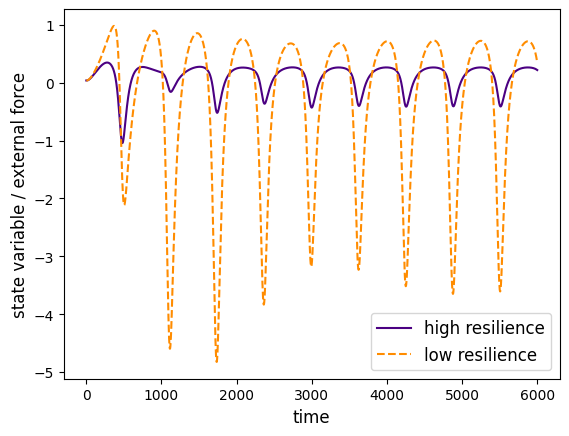

In [86]:
plt.plot(rsh, c= 'indigo', label = 'high resilience')
plt.plot(rsl, c = 'darkorange', label = 'low resilience', linestyle = "dashed")
plt.ylabel('state variable / external force', fontsize=12); plt.xlabel("time", fontsize=12)
legend = plt.legend( loc=4, fontsize=12, fancybox=True)
legend.set_title("")  
plt.show()

## Differential force ##

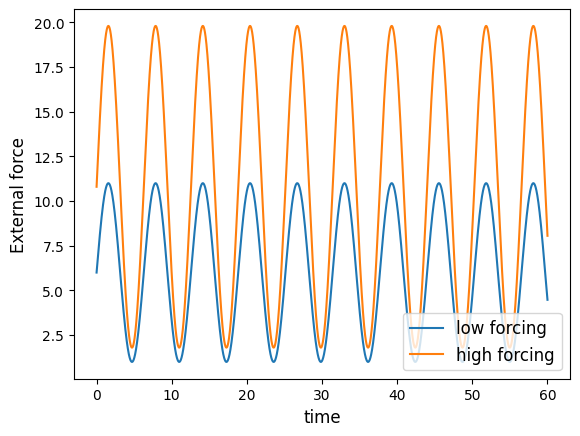

In [87]:
Fl = F1(5, tm)
Fh = F1(9, tm)
plt.plot(tm, Fl, label = 'low forcing')
plt.plot(tm, Fh, label = 'high forcing')
plt.ylabel('External force', fontsize=12); plt.xlabel("time", fontsize=12)
legend = plt.legend( loc=4, fontsize=12, fancybox=True)
legend.set_title("") 

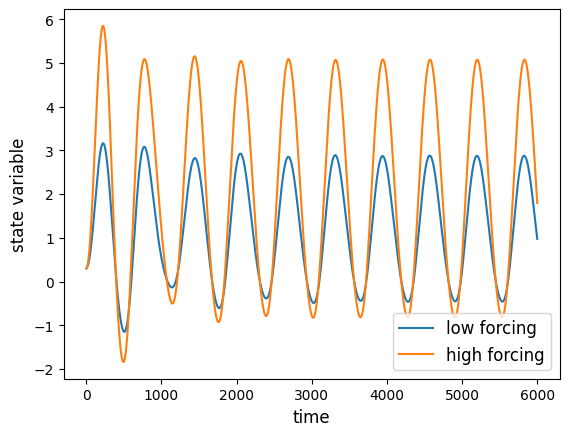

In [88]:
plt.plot(spring_damper_simu(Fl, 0.3, 0.1, 2, 1), label = 'low forcing')
plt.plot(spring_damper_simu(Fh, 0.3, 0.1, 2, 1), label = 'high forcing')
plt.ylabel('state variable', fontsize=12); plt.xlabel("time", fontsize=12)
legend = plt.legend( loc=4, fontsize=12, fancybox=True)
legend.set_title("") 
plt.show()

In [89]:
posl1 = spring_damper_simu(Fl, 0.3, 0.1, 2, 1)
posl = posl1[1:]
rposl = posl/Fl

In [90]:
posh1 = spring_damper_simu(Fh, 0.3, 0.1, 2, 1)
posh = posh1[1:]
rposh = posh/Fh

[]

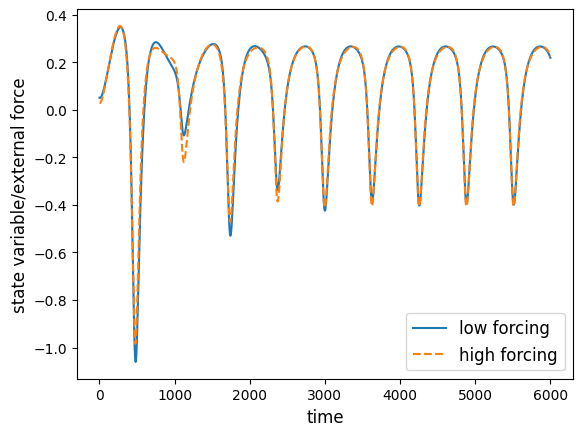

In [91]:
plt.plot(rposl, label = 'low forcing')
plt.plot(rposh, label = 'high forcing', linestyle="dashed")
plt.ylabel('state variable/external force', fontsize=12); plt.xlabel("time", fontsize=12)
legend = plt.legend( loc=4, fontsize=12, fancybox=True)
legend.set_title("") 
plt.plot()